In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

In [2]:
data_path='/Users/danielbabin/Documents/GitHub/XRF_Data_Report/Data/'

In [3]:
raw=pd.read_csv(data_path+'calibration_samples_raw.csv')

In [4]:
elements=raw.columns[4:-1]
e='Si 251.611'

# Dilution Factor

In [5]:
raw['Dilution Correction']=raw['Dilution Factor']/4000
dilution_corrected=raw.copy()
dilution_corrected[elements]=raw[elements].mul(raw['Dilution Correction'],axis=0)

# Correct Drift

In [6]:
from scipy import interpolate

In [7]:
drifts=dilution_corrected[dilution_corrected['Solution Label']=='D']

In [8]:
drift_correction_factors=dilution_corrected.copy()
for el in elements:
    f=interpolate.interp1d(drifts[el].index,drifts[el],bounds_error=False,fill_value='extrapolate')
    drift_correction_factors[el]=f(drift_correction_factors.index)/dilution_corrected[el].mean()

In [9]:
drift_corrected=dilution_corrected.copy()
drift_corrected[elements]=dilution_corrected[elements]/drift_correction_factors[elements]

## Check Drift Correction
### Drifts

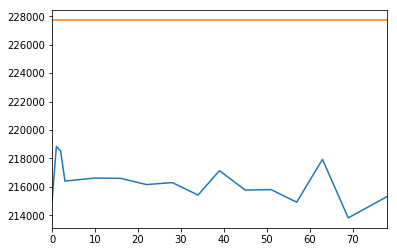

In [10]:
dilution_corrected[dilution_corrected['Solution Label']=='D'][e].plot()
drift_corrected[drift_corrected['Solution Label']=='D'][e].plot()

### Blanks

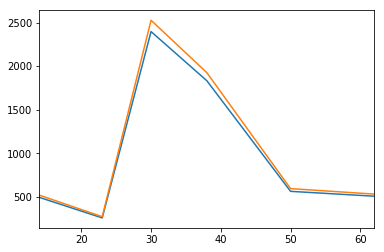

In [11]:
dilution_corrected[dilution_corrected['Solution Label']=='B'][e].plot()
drift_corrected[drift_corrected['Solution Label']=='B'][e].plot()

In [12]:
sr=dilution_corrected[dilution_corrected['Solution Label']=='B'][e].std()
mr=dilution_corrected[drift_corrected['Solution Label']=='B'][e].mean()
sd=drift_corrected[dilution_corrected['Solution Label']=='B'][e].std()
md=drift_corrected[drift_corrected['Solution Label']=='B'][e].mean()
print(sr/mr*100)
print(sd/md*100)

87.1845567203448
87.27185904822417


### Standards

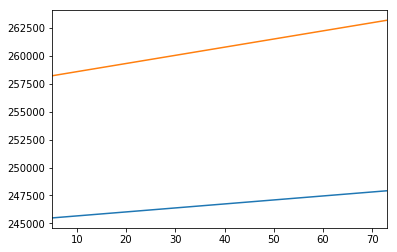

In [13]:
dilution_corrected[dilution_corrected['Site']=='STD'][e].iloc[1::6].plot()
drift_corrected[drift_corrected['Site']=='STD'][e].iloc[1::6].plot()

In [14]:
sr=dilution_corrected[dilution_corrected['Site']=='STD'][e].iloc[1::6].std()
mr=dilution_corrected[drift_corrected['Site']=='STD'][e].iloc[1::6].mean()
sd=drift_corrected[dilution_corrected['Site']=='STD'][e].iloc[1::6].std()
md=drift_corrected[drift_corrected['Site']=='STD'][e].iloc[1::6].mean()
print(sr/mr*100)
print(sd/md*100)

0.6979280444053735
1.3498550261241122


### All Unknowns and Standards

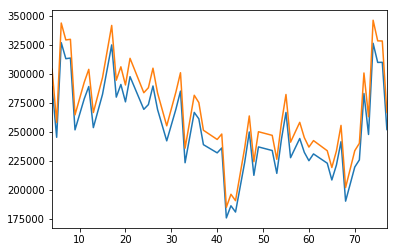

In [15]:
dilution_corrected[(dilution_corrected['Solution Label']!='D')&(dilution_corrected['Solution Label']!='B')][e].plot()
drift_corrected[(dilution_corrected['Solution Label']!='D')&(dilution_corrected['Solution Label']!='B')][e].plot()

# Blank Correction

In [16]:
blanks=drift_corrected[drift_corrected['Solution Label']=='B']
blank_corrected=drift_corrected.copy()
blank_corrected[elements]=drift_corrected[elements]-blanks[elements].mean()
samples_standards=blank_corrected[(blank_corrected['Solution Label']!='D')&
                                  (blank_corrected['Solution Label']!='B')]

# Sensitivities

In [78]:
knowns=pd.read_csv(data_path+'calibration_standards.csv',index_col='Standard')

In [79]:
knowns

,Al2O3,Ba,CaO,Cr,Cu,Fe2O3 T,K2O,MgO,MnO,Na2O,...,P2O5.1,Sc,SiO2,SiO2.1,Sr,TiO2,V,Y,Zn,Zr
Standard,,,,,,,,,,,,,,,,,,,,,
MAG-1,16.40,480.0,1.37,97,30.0,6.80,3.550,3.00,0.098000,3.83000,...,0.160,17.0,57.80,57.80,150.0,0.75,140,28.0,130.0,130.0
JA-2,15.41,321.0,5.92,436,29.7,5.85,1.810,7.60,0.108000,3.11388,...,0.146,19.6,NaN,NaN,NaN,0.66,126,18.3,64.7,116.0
GSP-2,14.90,1340.0,2.10,20,43.0,4.90,5.380,0.96,0.041318,2.78000,...,0.290,6.3,66.60,66.60,240.0,0.66,52,28.0,120.0,550.0
SCO-1,13.70,570.0,2.62,68,29.0,5.13,2.770,2.72,0.052939,0.90000,...,0.210,11.0,62.80,62.80,170.0,0.63,130,26.0,100.0,160.0
JS1-1,17.62,NaN,1.43,58,40.0,6.40,2.850,2.48,0.062000,2.20000,...,0.190,NaN,60.30,60.30,192.0,0.73,135,NaN,112.0,NaN
W2,15.45,170.0,10.53,92,110.0,10.83,0.626,6.37,0.167000,2.20000,...,0.140,36.0,52.68,52.68,190.0,1.06,260,23.0,80.0,100.0
MAG-1,16.40,480.0,1.37,97,30.0,6.80,3.550,3.00,0.098000,3.83000,...,0.160,17.0,57.80,57.80,150.0,0.75,140,28.0,130.0,130.0
JA-2,15.41,321.0,5.92,436,29.7,5.85,1.810,7.60,0.108000,3.11388,...,0.146,19.6,NaN,NaN,NaN,0.66,126,18.3,64.7,116.0
GSP-2,14.90,1340.0,2.10,20,43.0,4.90,5.380,0.96,0.041318,2.78000,...,0.290,6.3,66.60,66.60,240.0,0.66,52,28.0,120.0,550.0


In [80]:
for λ,oxide in zip(elements,knowns.columns):
    samples_standards=samples_standards.rename(columns={λ:oxide})
standards=samples_standards[samples_standards['Site']=='STD'].set_index('Solution Label')

In [81]:
standards.columns

Index(['Solution Type', 'Site', 'Time', 'Al2O3', 'Ba', 'CaO', 'Cr', 'Cu',
       'Fe2O3 T', 'K2O', 'MgO', 'MnO', 'Na2O', 'Ni', 'P2O5', 'P2O5.1', 'Sc',
       'SiO2', 'SiO2.1', 'Sr', 'TiO2', 'V', 'Y', 'Zn', 'Zr', 'Dilution Factor',
       'Depth CCSF (m)', 'Dilution Correction'],
      dtype='object')

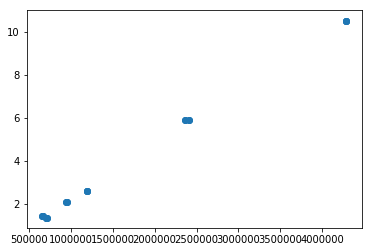

In [82]:
e='CaO'
stds=knowns[e].dropna().index
fig,ax=plt.subplots()
ax.scatter(standards.loc[stds,e],knowns.loc[stds,e])

In [83]:
standards[e],knowns[e]

(Solution Label
 MAG-1    7.142331e+05
 JA-2     2.366412e+06
 GSP-2    9.475415e+05
 SCO-1    1.196058e+06
 JS1-1    6.616609e+05
 W2       4.289364e+06
 MAG-1    7.047990e+05
 JA-2     2.413795e+06
 GSP-2    9.514401e+05
 SCO-1    1.190106e+06
 JS1-1    6.561357e+05
 W2       4.285586e+06
 Name: CaO, dtype: float64, Standard
 MAG-1     1.37
 JA-2      5.92
 GSP-2     2.10
 SCO-1     2.62
 JS1-1     1.43
 W2       10.53
 MAG-1     1.37
 JA-2      5.92
 GSP-2     2.10
 SCO-1     2.62
 JS1-1     1.43
 W2       10.53
 Name: CaO, dtype: float64)

In [84]:
elements=knowns.columns
from scipy import stats
sensitivities=pd.DataFrame(columns=knowns.columns)
for element in elements:
    stds=knowns[element].dropna().index
    sensitivities.loc['slope',element]=stats.linregress(standards.loc[stds,element],knowns.loc[stds,element]).slope
    sensitivities.loc['intercept',element]=stats.linregress(standards.loc[stds,element],knowns.loc[stds,element]).intercept

In [85]:
sensitivities['SiO2']

slope        0.000162161
intercept        9.22986
Name: SiO2, dtype: object

# Concentrations

In [86]:
samples=samples_standards[samples_standards['Site']!='STD']

In [87]:
concentrations=samples.copy()
for element in elements:
    concentrations[element]=samples[element]*sensitivities.loc['slope',element]+sensitivities.loc['intercept',element]

In [88]:
concentrations.columns

Index(['Solution Type', 'Solution Label', 'Site', 'Time', 'Al2O3', 'Ba', 'CaO',
       'Cr', 'Cu', 'Fe2O3 T', 'K2O', 'MgO', 'MnO', 'Na2O', 'Ni', 'P2O5',
       'P2O5.1', 'Sc', 'SiO2', 'SiO2.1', 'Sr', 'TiO2', 'V', 'Y', 'Zn', 'Zr',
       'Dilution Factor', 'Depth CCSF (m)', 'Dilution Correction'],
      dtype='object')

In [89]:
unnecessary_columns=['Solution Type','Site', 'Time','P2O5.1','SiO2.1','Dilution Factor', 'Dilution Correction']
concentrations.rename(columns={'Fe2O3 T':'Fe2O3'},inplace=True)

In [90]:
final=concentrations.loc[concentrations['Site']=='U1474'].drop(unnecessary_columns,axis=1)

In [91]:
final.columns

Index(['Solution Label', 'Al2O3', 'Ba', 'CaO', 'Cr', 'Cu', 'Fe2O3', 'K2O',
       'MgO', 'MnO', 'Na2O', 'Ni', 'P2O5', 'Sc', 'SiO2', 'Sr', 'TiO2', 'V',
       'Y', 'Zn', 'Zr', 'Depth CCSF (m)'],
      dtype='object')

In [92]:
final['CaO']

40    28.380715
41    22.179350
42    37.373422
43    33.592760
44    35.008892
46    30.230232
47    22.941697
48    31.832391
49    24.561311
52    30.791958
53    26.089015
54    20.259768
55    26.503496
56    25.760520
58    22.413912
59    27.250791
60    28.716698
61    28.312961
64    29.379191
65    31.315174
66    28.126563
67    23.230337
68    29.315644
70    22.972325
71    30.146887
Name: CaO, dtype: float64

In [93]:
final[['Al2O3','CaO','Fe2O3','K2O','MgO','MnO','SiO2','P2O5','TiO2']].sum(axis=1)

40     97.607175
41     94.119639
42     94.052168
43     94.216216
44     94.092048
46     97.461988
47    100.115568
48     98.246328
49     97.530764
52    102.579825
53     94.934552
54     96.845758
55    103.671187
56     98.580349
58     98.384407
59     97.556891
60     96.348883
61     97.144530
64     98.253191
65     94.373259
66     98.571729
67     96.028307
68     91.450748
70     92.171149
71    100.174948
dtype: float64

# Export

In [94]:
table_path='/Users/danielbabin/Documents/GitHub/XRF_Data_Report/Tables/'

In [95]:
final.to_csv(data_path+'calibration_samples.csv')
final.to_csv(table_path+'calibration_samples.csv')